In this notebook we explore the responses to the odor onset in the closed loop trials.

In [1]:
%reset -f
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from data import DataLoader
from db import d_models, make_session
from plot import set_font_size

import CONFIG as C
import LOCAL as L

In [2]:
# trial selection filter
FILT = [
    d_models.Trial.expt == 'closed_loop',
]

session = make_session()
trials = session.query(d_models.Trial).filter(*FILT).all()
session.close()

for trial in trials:
    trial.dl = DataLoader(trial, sfx=0, vel_filt=None)

Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clea

# Odor-triggered DAN and behavioral responses

In [3]:
WINDOW = (-3, 15)  # window surrounding odor onset to look at
PLOTS = np.array([
    ('v_fwd', 'speed', 'air', 'abs_air',),
    ('g2s', 'g2d', 'g2l', 'g2r',),
    ('g3s', 'g3d', 'g3l', 'g3r',),
    ('g4s', 'g4d', 'g4l', 'g4r',),
    ('g5s', 'g5d', 'g5l', 'g5r',),
    ('ddt_g2s', 'ddt_g2d', 'ddt_g2l', 'ddt_g2r',),
    ('ddt_g3s', 'ddt_g3d', 'ddt_g3l', 'ddt_g3r',),
    ('ddt_g4s', 'ddt_g4d', 'ddt_g4l', 'ddt_g4r',),
    ('ddt_g5s', 'ddt_g5d', 'ddt_g5l', 'ddt_g5r',),
])

data = {vbl: [] for vbl in list(PLOTS.flatten()) + ['t']}

for trial in trials:
    t = trial.dl.t
    mask = ((C.ODOR_START+WINDOW[0]) <= t) & (t < (C.ODOR_START+WINDOW[1]))
    for vbl in data.keys():
        if vbl in ['air', 'abs_air']:
            temp = getattr(trial.dl, vbl).copy()
            temp[np.abs(trial.dl.air) >= 90] = np.nan
            data_ = temp[mask]
        else:
            data_ = getattr(trial.dl, vbl)[mask]
            
        data[vbl].append(data_)

/Users/rkp/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in greater_equal


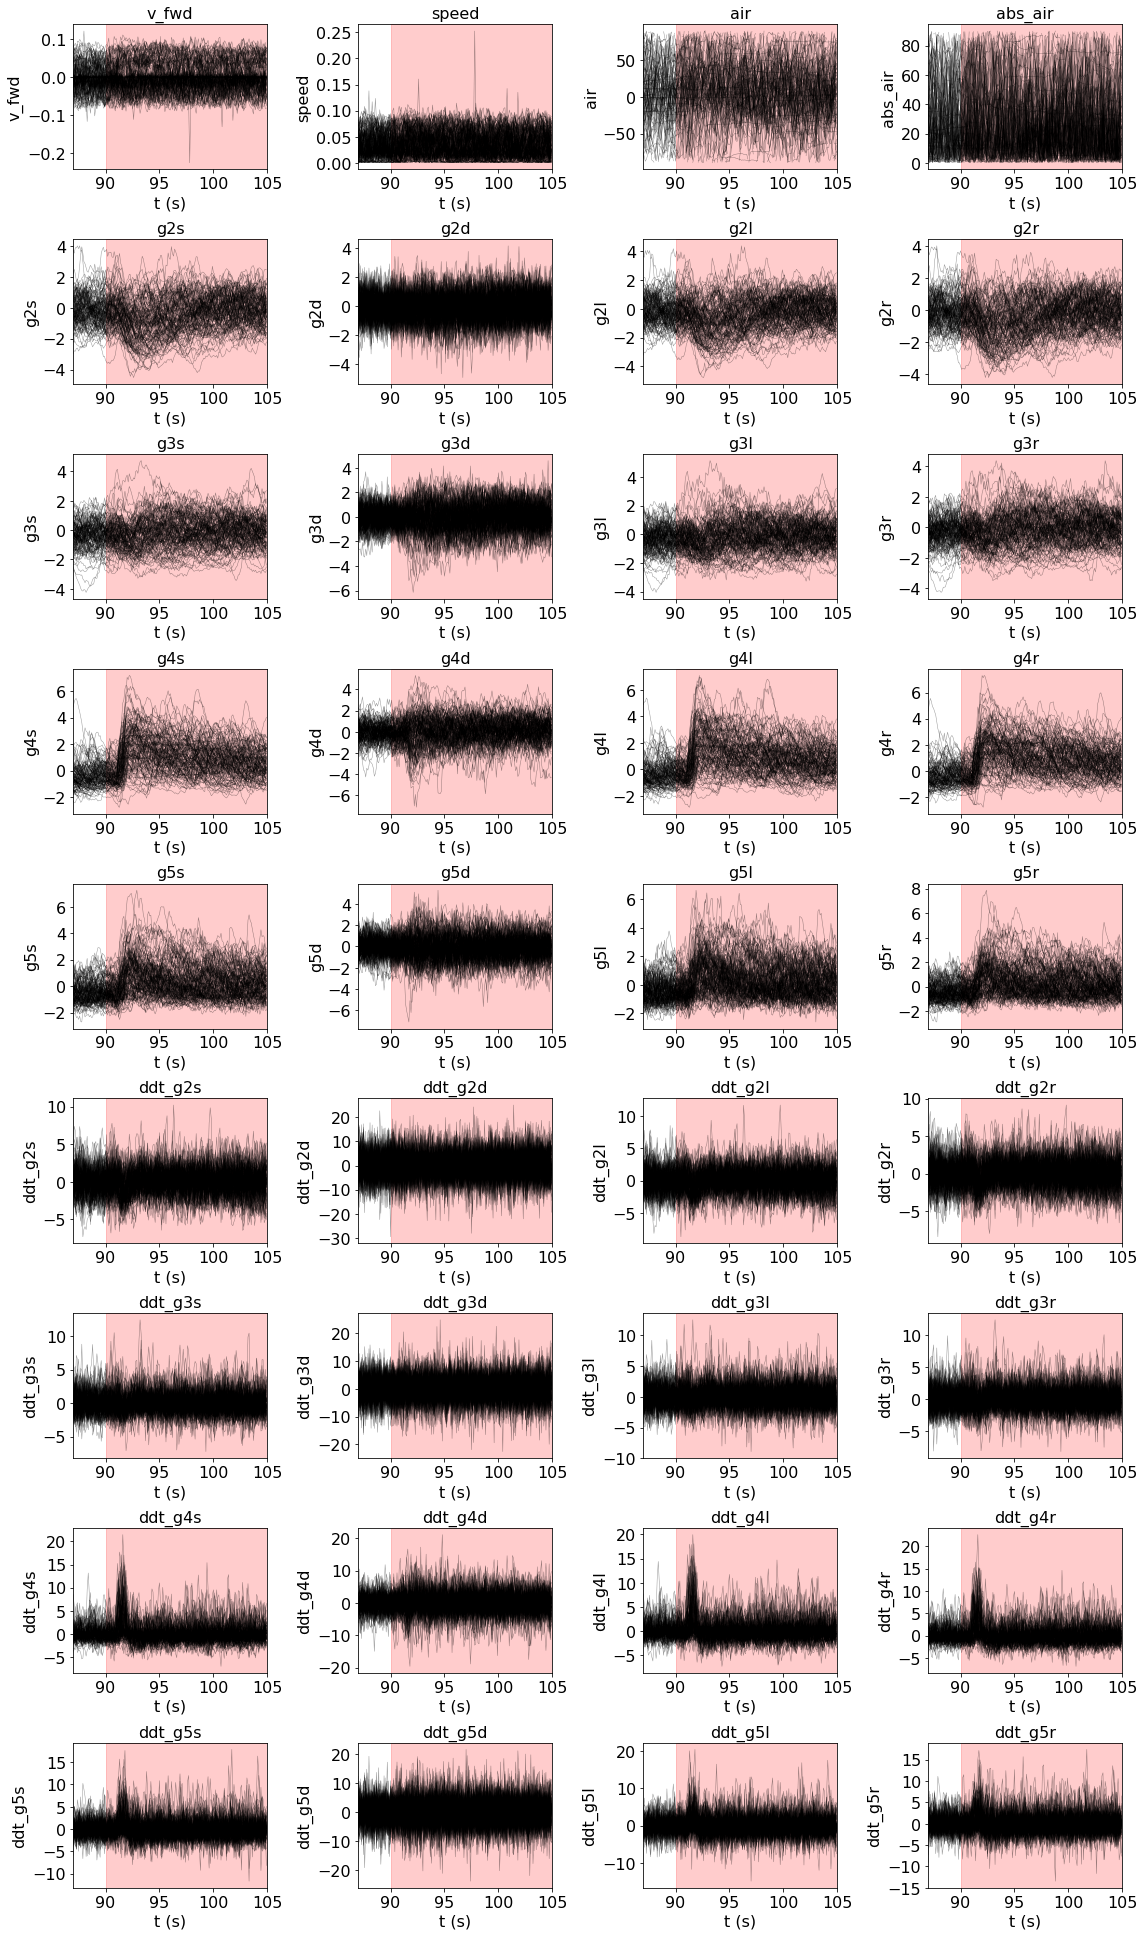

In [4]:
AX_SIZE = (4, 3)
N_ROWS = len(PLOTS)
N_COLS = len(PLOTS[0])
FIG_SIZE = (AX_SIZE[0]*N_COLS, AX_SIZE[1]*N_ROWS)

fig, axs = plt.subplots(N_ROWS, N_COLS, figsize=FIG_SIZE, tight_layout=True, squeeze=False)

for r_ctr, ax_row in enumerate(axs):
    for c_ctr, ax in enumerate(ax_row):
        
        vbl = PLOTS[r_ctr, c_ctr]
        
        for tr_ctr in range(len(trials)):
            ax.plot(data['t'][tr_ctr], data[vbl][tr_ctr], color='k', lw=0.5, alpha=0.4)
        
        ax.axvspan(C.ODOR_START, C.ODOR_START+WINDOW[1], color='r', alpha=0.2)
        ax.set_xlim(C.ODOR_START+WINDOW[0], C.ODOR_START+WINDOW[1])
        ax.set_xlabel('t (s)')
        ax.set_ylabel(vbl)
        ax.set_title(vbl)
        
for ax in axs.flatten():
    set_font_size(ax, 16)

### Look at speed and v_fwd response more closely

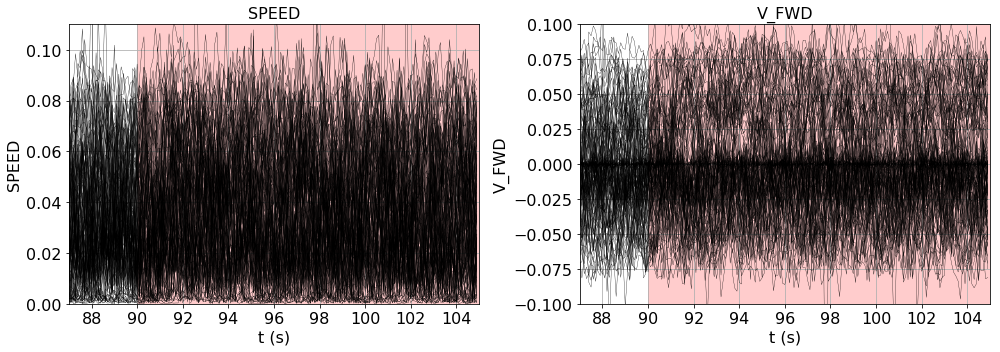

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5), tight_layout=True)

for tr_ctr in range(len(trials)):
    
    t = data['t'][tr_ctr]
    
    axs[0].plot(t, data['speed'][tr_ctr], color='k', lw=.3)
    axs[1].plot(t, data['v_fwd'][tr_ctr], color='k', lw=.3)
    
axs[0].set_ylabel('SPEED')
axs[0].set_title('SPEED')
axs[1].set_ylabel('V_FWD')
axs[1].set_title('V_FWD')

axs[0].set_ylim(0, .11)
axs[1].set_ylim(-.1, .1)

for ax in axs:
    ax.grid()
    ax.axvspan(C.ODOR_START, C.ODOR_START+WINDOW[1], color='r', alpha=0.2)
    ax.set_xlim(C.ODOR_START+WINDOW[0], C.ODOR_START+WINDOW[1])
    ax.set_xlabel('t (s)')
    
    set_font_size(ax, 16)

### Look at the G4S and DDT_G4S response more closely

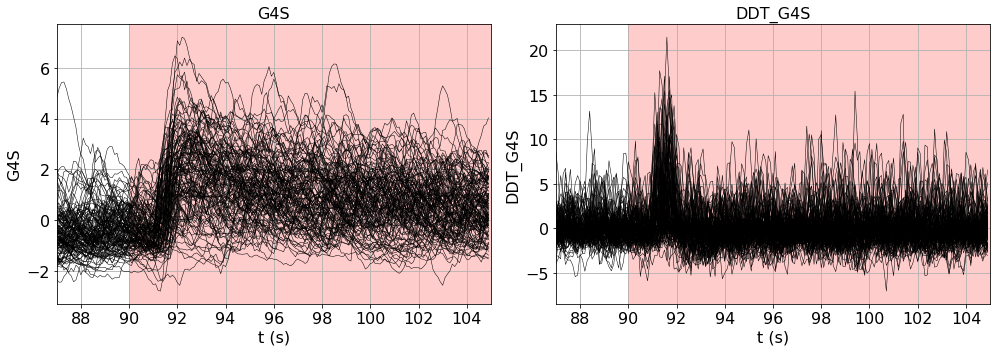

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5), tight_layout=True)

for tr_ctr in range(len(trials)):
    
    t = data['t'][tr_ctr]
    
    axs[0].plot(t, data['g4s'][tr_ctr], color='k', lw=.5)
    axs[1].plot(t, data['ddt_g4s'][tr_ctr], color='k', lw=.5)
    
axs[0].set_ylabel('G4S')
axs[0].set_title('G4S')
axs[1].set_ylabel('DDT_G4S')
axs[1].set_title('DDT_G4S')

for ax in axs:
    ax.grid()
    ax.axvspan(C.ODOR_START, C.ODOR_START+WINDOW[1], color='r', alpha=0.2)
    ax.set_xlim(C.ODOR_START+WINDOW[0], C.ODOR_START+WINDOW[1])
    ax.set_xlabel('t (s)')
    
    set_font_size(ax, 16)

Make DataFrame of various scalar metrics of the different variables:

* `AIR_ON`: air tube position at odor onset
* `AIR_ABS_ON`: air tube position absolute value at odor onset
* `G4S_ON`: G4S, time-averaged over short window following odor onset
* `DDT_G4S_ON`: G4S time-derivative, time-averaged over short window following odor onset

In [7]:
COLS = ['TRIAL', 'AIR_ON', 'AIR_ABS_ON', 'G4S_ON', 'DDT_G4S_ON']

WINDOW_G4S = (92, 93)
WINDOW_DDT_G4S = (91, 92)

df_data = []

for tr_ctr, trial in enumerate(trials):
    
    t = data['t'][tr_ctr]
    
    df_data_ = {'TRIAL': trial.name}

    # heading at odor onset
    df_data_['AIR_ON'] = data['air'][tr_ctr][t >= C.ODOR_START][0]
    # abs heading at odor onset
    df_data_['AIR_ABS_ON'] = np.abs(data['air'][tr_ctr][t >= C.ODOR_START][0])
    
    # G4S time-averaged over short window following odor onset
    mask_g4s = (WINDOW_G4S[0] <= t) & (t < WINDOW_G4S[1])
    df_data_['G4S_ON'] = data['g4s'][tr_ctr][mask_g4s].mean()
    
    # DDT_G4S time-averaged over short window following odor onset
    mask_ddt_g4s = (WINDOW_DDT_G4S[0] <= t) & (t < WINDOW_DDT_G4S[1])
    df_data_['DDT_G4S_ON'] = data['ddt_g4s'][tr_ctr][mask_ddt_g4s].mean()
    
    df_data.append(df_data_)
    
df = pd.DataFrame(df_data, columns=COLS)

In [8]:
df.round(2)

,TRIAL,AIR_ON,AIR_ABS_ON,G4S_ON,DDT_G4S_ON
0,20160904.Fly4.2,-27.10,27.10,0.05,1.75
1,20160904.Fly4.3,NaN,NaN,0.96,-0.75
2,20160904.Fly4.6,-34.73,34.73,0.80,-0.22
3,20160904.Fly4.7,NaN,NaN,1.13,0.16
4,20160904.Fly5.3,51.34,51.34,1.32,0.95
5,20160904.Fly5.4,11.77,11.77,3.70,5.18
6,20160904.Fly6.1,-59.82,59.82,0.28,0.29
7,20160904.Fly6.2,-32.09,32.09,0.37,0.83
8,20160904.Fly6.3,-46.39,46.39,1.00,3.49
9,20160904.Fly6.4,-23.06,23.06,-0.60,1.46


In [9]:
df.corr()

,AIR_ON,AIR_ABS_ON,G4S_ON,DDT_G4S_ON
AIR_ON,1.000000,-0.039081,0.048920,0.076870
AIR_ABS_ON,-0.039081,1.000000,0.071863,-0.054478
G4S_ON,0.048920,0.071863,1.000000,0.826847
DDT_G4S_ON,0.076870,-0.054478,0.826847,1.000000


Here we see relatively little correlation between the air tube position at the odor onset and the subsequent G4S or DDT_G4S response, which is shown in the scatter plot below.

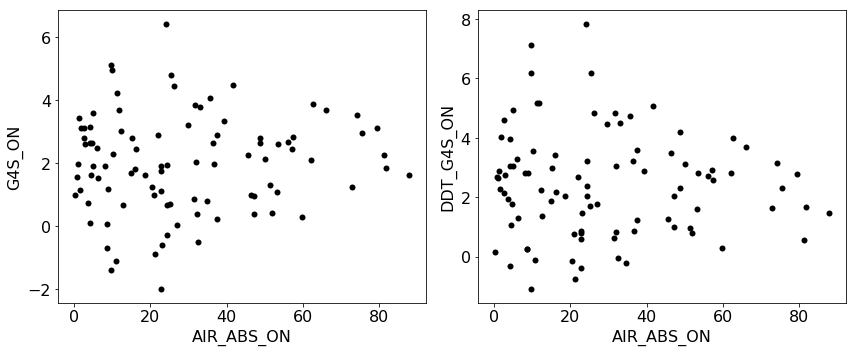

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), tight_layout=True)

axs[0].scatter(df['AIR_ABS_ON'], df['G4S_ON'], c='k', lw=0)
axs[0].set_xlabel('AIR_ABS_ON')
axs[0].set_ylabel('G4S_ON')

axs[1].scatter(df['AIR_ABS_ON'], df['DDT_G4S_ON'], c='k', lw=0)
axs[1].set_xlabel('AIR_ABS_ON')
axs[1].set_ylabel('DDT_G4S_ON')

for ax in axs.flatten():
    set_font_size(ax, 16)